# Recommendation Systems: Association Rules and Collaboration Filtering
#### Rick Gosalvez, 2021 Data Mining

# Theory - Association Rules (Binary)

Process:
1. Calc <b>SUPPORT = sum ea column / num rows</b>; <u>eliminate</u> under cut-off (cut-off is up to you)
*   1a. for 1 unit set
*   1b. for 2 unit set 
*   1c. for 3 unit set 
*   1d. Summarize Final Frequent Items set (cr8 new table; not eliminated) 
2. Calc <b>CONFIDENCE</b>; <u>eliminate</u>  under cut-off (cut-off is up to you)
*   2a. focus on item sets with causality (e.g. not individual items)
*   2b. create table: {item set, Causality, Support(A and B), Support(A), Confidence}
*   2c. calc CONFIDENCE = <b>Support(A and B) / Support(A)</b>
*   2d. Summarize Final Table (cr8 new table) based on confidence (not eliminiated)
3. Calc <b>LIFT = conf(A and B) / Support(b)</b>
*   3a. add lift column to table
*   3b. Summarize <u>Final Rules Table</U> (cr8 new table) based on LIFT
4. Calc <b>LEVERAGE = Support(A and B) - (Support(A) * Support(B))</b>
*   4a. add leverage to table
*   4b. <u>prioritize</u> strategy based on LEVERAGE, then LIFT

## Theory (Hand Calcs)

1a. Support Calculations

![Support Calculations](img/HW6_Q1a.jpg)

1b. Confidence Calculations

![Support Calculations](img/HW6_Q1b.jpg)

1c & 1d. Lift/Leverage Calculations and Strategy

![Support Calculations](img/HW6_Q1cd.jpg)

## Theory (Python Calcs)

In [1]:
import numpy as np
import pandas as pd

df  = pd.read_csv("binarytbl.csv")
df

Transaction  Item 1  Item 2  Item 3  Item 4  Item 5  Item 6  Item 7
0             1       0       1       1       1       1       0       1
1             2       0       0       1       0       1       0       1
2             3       0       1       0       0       1       1       1
3             4       0       0       1       1       1       0       1
4             5       0       1       0       0       1       0       1
5             6       0       0       0       0       1       0       0
6             7       0       1       1       1       1       0       1
7             8       0       0       1       1       0       0       1
8             9       0       0       0       0       1       0       0
9            10       1       1       1       1       0       0       0
10           11       0       0       1       0       0       0       1
11           12       0       0       1       1       1       0       1

In [2]:
df = df.drop(['Transaction'],axis=1)

### Theory 1a. - Calculate support and find the candidates whose support >= 0.4

#### 1 unit item set (cut-off < 0.4)

In [3]:
cutoff = 0.4

df2 = pd.DataFrame(df.T)
df2.loc[:,'Total'] = df2.sum(axis=1)
df2['Support']   = (df2['Total'] / len(df))
df2["Support"]   = df2["Support"].astype(float)
df2['Result']    = (df2['Support'] < cutoff)     # if True; eliminate
df2

0  1  2  3  4  5  6  7  8  9  10  11  Total   Support  Result
Item 1  0  0  0  0  0  0  0  0  0  1   0   0      1  0.083333    True
Item 2  1  0  1  0  1  0  1  0  0  1   0   0      5  0.416667   False
Item 3  1  1  0  1  0  0  1  1  0  1   1   1      8  0.666667   False
Item 4  1  0  0  1  0  0  1  1  0  1   0   1      6  0.500000   False
Item 5  1  1  1  1  1  1  1  0  1  0   0   1      9  0.750000   False
Item 6  0  0  1  0  0  0  0  0  0  0   0   0      1  0.083333    True
Item 7  1  1  1  1  1  0  1  1  0  0   1   1      9  0.750000   False

In [4]:
df = df.drop(['Item 1','Item 6'],axis=1)

### 2 unit item set (cut-off < 0.4)

#### Add combinations to table

In [5]:
df['2_3']   = (df['Item 2'] == 1) & (df['Item 3'] == 1)
df["2_3"]   = df["2_3"].astype(int)
df['2_4']   = (df['Item 2'] == 1) & (df['Item 4'] == 1)
df["2_4"]   = df["2_4"].astype(int)
df['2_5']   = (df['Item 2'] == 1) & (df['Item 5'] == 1)
df["2_5"]   = df["2_5"].astype(int)
df['2_7']   = (df['Item 2'] == 1) & (df['Item 7'] == 1)
df["2_7"]   = df["2_7"].astype(int)
df['3_4']   = (df['Item 3'] == 1) & (df['Item 4'] == 1)
df["3_4"]   = df["3_4"].astype(int)
df['3_5']   = (df['Item 3'] == 1) & (df['Item 5'] == 1)
df["3_5"]   = df["3_5"].astype(int)
df['3_7']   = (df['Item 3'] == 1) & (df['Item 7'] == 1)
df["3_7"]   = df["3_7"].astype(int)
df['4_5']   = (df['Item 4'] == 1) & (df['Item 5'] == 1)
df["4_5"]   = df["4_5"].astype(int)
df['4_7']   = (df['Item 4'] == 1) & (df['Item 7'] == 1)
df["4_7"]   = df["4_7"].astype(int)
df['5_7']   = (df['Item 5'] == 1) & (df['Item 7'] == 1)
df["5_7"]   = df["5_7"].astype(int)

In [6]:
df_2itemset = df.iloc[:,5:]
# df_2itemset

In [7]:
cutoff = 0.4

df3 = pd.DataFrame(df_2itemset.T)
df3.loc[:,'Total'] = df3.sum(axis=1)
df3['Support']   = (df3['Total'] / len(df))
df3["Support"]   = df3["Support"].astype(float)
df3['Result']    = (df3['Support'] < cutoff)     # if True; eliminate
df3

0  1  2  3  4  5  6  7  8  9  10  11  Total   Support  Result
2_3  1  0  0  0  0  0  1  0  0  1   0   0      3  0.250000    True
2_4  1  0  0  0  0  0  1  0  0  1   0   0      3  0.250000    True
2_5  1  0  1  0  1  0  1  0  0  0   0   0      4  0.333333    True
2_7  1  0  1  0  1  0  1  0  0  0   0   0      4  0.333333    True
3_4  1  0  0  1  0  0  1  1  0  1   0   1      6  0.500000   False
3_5  1  1  0  1  0  0  1  0  0  0   0   1      5  0.416667   False
3_7  1  1  0  1  0  0  1  1  0  0   1   1      7  0.583333   False
4_5  1  0  0  1  0  0  1  0  0  0   0   1      4  0.333333    True
4_7  1  0  0  1  0  0  1  1  0  0   0   1      5  0.416667   False
5_7  1  1  1  1  1  0  1  0  0  0   0   1      7  0.583333   False

### 3 unit item set (cut-off < 0.4)

In [8]:
df = df.drop(['Item 2','2_3','2_4','2_5','2_7','4_5'],axis=1)

#### Add combinations to table

In [9]:
df['3_4_5']   = (df['Item 3'] == 1) & (df['Item 4'] == 1) & (df['Item 5'] == 1)
df["3_4_5"]   = df["3_4_5"].astype(int)
df['3_4_7']   = (df['Item 3'] == 1) & (df['Item 4'] == 1) & (df['Item 7'] == 1)
df["3_4_7"]   = df["3_4_7"].astype(int)
df['4_5_7']   = (df['Item 4'] == 1) & (df['Item 5'] == 1) & (df['Item 7'] == 1)
df["4_5_7"]   = df["4_5_7"].astype(int)
df['3_5_7']   = (df['Item 3'] == 1) & (df['Item 5'] == 1) & (df['Item 7'] == 1)
df["3_5_7"]   = df["3_5_7"].astype(int)

In [10]:
df_3itemset = df.iloc[:,9:]
# df_3itemset

In [11]:
cutoff = 0.4

df4 = pd.DataFrame(df_3itemset.T)
df4.loc[:,'Total'] = df4.sum(axis=1)
df4['Support']     = (df4['Total'] / len(df))
df4["Support"]     = df4["Support"].astype(float)
df4['Result']      = (df4['Support'] < cutoff)     # if True; eliminate
df4

0  1  2  3  4  5  6  7  8  9  10  11  Total   Support  Result
3_4_5  1  0  0  1  0  0  1  0  0  0   0   1      4  0.333333    True
3_4_7  1  0  0  1  0  0  1  1  0  0   0   1      5  0.416667   False
4_5_7  1  0  0  1  0  0  1  0  0  0   0   1      4  0.333333    True
3_5_7  1  1  0  1  0  0  1  0  0  0   0   1      5  0.416667   False

#### Combine df2, df3, df4 and filter out only 'Result' == False

In [12]:
result = [df2,df3,df4]
df5 = pd.concat(result)
index_names = df5[ df5['Result'] == True ].index
df5.drop(index_names, inplace = True)
df5 = df5.drop([0,1,2,3,4,5,6,7,8,9,10,11,'Total','Result'],axis=1)
df5

Support
Item 2  0.416667
Item 3  0.666667
Item 4  0.500000
Item 5  0.750000
Item 7  0.750000
3_4     0.500000
3_5     0.416667
3_7     0.583333
4_7     0.416667
5_7     0.583333
3_4_7   0.416667
3_5_7   0.416667

## Theory 1b. - Use 1a to calc the confidence and find the rules whose conf >= 0.7.

### Create new dataframe to calc Confidence = Support(A and B) / Support(A)

In [13]:
data = {'Item_Set'      :['3_4','3_4','3_5','3_5','3_7','3_7','4_7','4_7','5_7','5_7','3_4_7','3_4_7','3_4_7','3_4_7','3_4_7','3_4_7','3_5_7','3_5_7','3_5_7','3_5_7','3_5_7','3_5_7'],
        'Causality'     :['3_4','4_3','3_5','5_3','3_7','7_3','4_7','7_4','5_7','7_5','34_7','37_4','74_3','3_74','7_34','4_37','35_7','37_5','75_3','3_75','7_35','5_37'],
        'Support(AandB)':[0.5,0.5,0.42,0.42,0.58,0.58,0.42,0.42,0.58,0.58,0.42,0.42,0.42,0.42,0.42,0.42,0.42,0.42,0.42,0.42,0.42,0.42],
        'Support(A)'    :[0.67,0.5,0.67,0.75,0.67,0.75,0.5,0.75,0.75,0.75,0.5,0.58,0.42,0.67,0.75,0.5,0.42,0.58,0.58,0.67,0.75,0.75]}
Conf = pd.DataFrame(data)

cutoff = 0.7

Conf['Conf']     = (Conf['Support(AandB)'] / Conf['Support(A)'])
Conf["Conf"]     = Conf["Conf"].astype(float)
Conf['Result']   = (Conf['Conf'] < cutoff)     # if True; eliminate

Conf

Item_Set Causality  Support(AandB)  Support(A)      Conf  Result
0       3_4       3_4            0.50        0.67  0.746269   False
1       3_4       4_3            0.50        0.50  1.000000   False
2       3_5       3_5            0.42        0.67  0.626866    True
3       3_5       5_3            0.42        0.75  0.560000    True
4       3_7       3_7            0.58        0.67  0.865672   False
5       3_7       7_3            0.58        0.75  0.773333   False
6       4_7       4_7            0.42        0.50  0.840000   False
7       4_7       7_4            0.42        0.75  0.560000    True
8       5_7       5_7            0.58        0.75  0.773333   False
9       5_7       7_5            0.58        0.75  0.773333   False
10    3_4_7      34_7            0.42        0.50  0.840000   False
11    3_4_7      37_4            0.42        0.58  0.724138   False
12    3_4_7      74_3            0.42        0.42  1.000000   False
13    3_4_7      3_74            0.42        0.67  0.626866    True
14    3_4_7      7_34            0.42        0.75  0.560000    True
15    3_4_7      4_37            0.42        0.50  0.840000   False
16    3_5_7      35_7            0.42        0.42  1.000000   False
17    3_5_7      37_5            0.42        0.58  0.724138   False
18    3_5_7      75_3            0.42        0.58  0.724138   False
19    3_5_7      3_75            0.42        0.67  0.626866    True
20    3_5_7      7_35            0.42        0.75  0.560000    True
21    3_5_7      5_37            0.42        0.75  0.560000    True

In [14]:
index_names = Conf[ Conf['Result'] == True ].index
Conf.drop(index_names, inplace = True)
Conf

Item_Set Causality  Support(AandB)  Support(A)      Conf  Result
0       3_4       3_4            0.50        0.67  0.746269   False
1       3_4       4_3            0.50        0.50  1.000000   False
4       3_7       3_7            0.58        0.67  0.865672   False
5       3_7       7_3            0.58        0.75  0.773333   False
6       4_7       4_7            0.42        0.50  0.840000   False
8       5_7       5_7            0.58        0.75  0.773333   False
9       5_7       7_5            0.58        0.75  0.773333   False
10    3_4_7      34_7            0.42        0.50  0.840000   False
11    3_4_7      37_4            0.42        0.58  0.724138   False
12    3_4_7      74_3            0.42        0.42  1.000000   False
15    3_4_7      4_37            0.42        0.50  0.840000   False
16    3_5_7      35_7            0.42        0.42  1.000000   False
17    3_5_7      37_5            0.42        0.58  0.724138   False
18    3_5_7      75_3            0.42        0.58  0.724138   False

## Theory 1c. - Use rules in 1.b to choose the those with lift > 1.2. 
* Lift = Conf(A and B) / Supp(B)

In [15]:
cutoff = 1.2

Conf['Supp(B)']       = [0.5,0.67,0.75,0.67,0.75,0.75,0.75,0.75,0.5,0.67,0.58,0.75,0.75,0.67]
Conf['Lift']          = (Conf['Conf'] / Conf['Supp(B)'])
Conf["Lift"]          = Conf["Lift"].astype(float)
Conf['Lift_Result']   = (Conf['Lift'] < cutoff)     # if True; eliminate
Conf

Item_Set Causality  Support(AandB)  Support(A)      Conf  Result  Supp(B)  \
0       3_4       3_4            0.50        0.67  0.746269   False     0.50   
1       3_4       4_3            0.50        0.50  1.000000   False     0.67   
4       3_7       3_7            0.58        0.67  0.865672   False     0.75   
5       3_7       7_3            0.58        0.75  0.773333   False     0.67   
6       4_7       4_7            0.42        0.50  0.840000   False     0.75   
8       5_7       5_7            0.58        0.75  0.773333   False     0.75   
9       5_7       7_5            0.58        0.75  0.773333   False     0.75   
10    3_4_7      34_7            0.42        0.50  0.840000   False     0.75   
11    3_4_7      37_4            0.42        0.58  0.724138   False     0.50   
12    3_4_7      74_3            0.42        0.42  1.000000   False     0.67   
15    3_4_7      4_37            0.42        0.50  0.840000   False     0.58   
16    3_5_7      35_7            0.42        0.42  1.000000   False     0.75   
17    3_5_7      37_5            0.42        0.58  0.724138   False     0.75   
18    3_5_7      75_3            0.42        0.58  0.724138   False     0.67   

        Lift  Lift_Result  
0   1.492537        False  
1   1.492537        False  
4   1.154229         True  
5   1.154229         True  
6   1.120000         True  
8   1.031111         True  
9   1.031111         True  
10  1.120000         True  
11  1.448276        False  
12  1.492537        False  
15  1.448276        False  
16  1.333333        False  
17  0.965517         True  
18  1.080803         True

### Filter based on result criteria

In [16]:
Conf[ (Conf['Support(AandB)'] >= 0.4) &
      (Conf['Conf'] >= 0.7) &
      (Conf['Lift'] >= 1.2)
    ]

Item_Set Causality  Support(AandB)  Support(A)      Conf  Result  Supp(B)  \
0       3_4       3_4            0.50        0.67  0.746269   False     0.50   
1       3_4       4_3            0.50        0.50  1.000000   False     0.67   
11    3_4_7      37_4            0.42        0.58  0.724138   False     0.50   
12    3_4_7      74_3            0.42        0.42  1.000000   False     0.67   
15    3_4_7      4_37            0.42        0.50  0.840000   False     0.58   
16    3_5_7      35_7            0.42        0.42  1.000000   False     0.75   

        Lift  Lift_Result  
0   1.492537        False  
1   1.492537        False  
11  1.448276        False  
12  1.492537        False  
15  1.448276        False  
16  1.333333        False

### Of filter based on values (same result as filter based on values b/c of analysis)

In [17]:
index_names = Conf[ Conf['Lift_Result'] == True ].index
Conf.drop(index_names, inplace = True)
#Conf

## Theory 1.d - Which rule(s) is/are the best (based on the lift)? What is your strategy for displaying items?

### Calc Leverage to prioritize. Leverage = Support(A and B) - (Supp(A) * Supp(B))

In [18]:
Conf['Leverage'] = (Conf['Support(AandB)'] - (Conf['Support(A)'] * Conf['Supp(B)']))
Conf

Item_Set Causality  Support(AandB)  Support(A)      Conf  Result  Supp(B)  \
0       3_4       3_4            0.50        0.67  0.746269   False     0.50   
1       3_4       4_3            0.50        0.50  1.000000   False     0.67   
11    3_4_7      37_4            0.42        0.58  0.724138   False     0.50   
12    3_4_7      74_3            0.42        0.42  1.000000   False     0.67   
15    3_4_7      4_37            0.42        0.50  0.840000   False     0.58   
16    3_5_7      35_7            0.42        0.42  1.000000   False     0.75   

        Lift  Lift_Result  Leverage  
0   1.492537        False    0.1650  
1   1.492537        False    0.1650  
11  1.448276        False    0.1300  
12  1.492537        False    0.1386  
15  1.448276        False    0.1300  
16  1.333333        False    0.1050

### Display strategy based on lift and leverage.

Based on association rules analysis, six rules offer returns (lift) greater than 1.2. 
* {if 3, then 4}
* {if 4, then 3}
* {if 3 & 7, then 4}
* {if 7 & 4, then 3}
* {if 4, then 3 & 7}
* {if 3 and 5, then 7}

When an individual item {3,4,5,7} is purchased, three bundles should be used to maximize profit:
* {3,4}
* {3,4,7}
* {3,5,7}

For example, 
* if a user buys 3, then we should show 4. If that user buys 4, then we should show 3 (already shown) & 7. Total of 3 possible items sold {3,4,7}.
* if a user buys 5 and 3, then we should show 7. If that user buys 7, then we should show 4. Total of 4 possible items sold {3,4,5,7}.

# Practice 1

## Practice 1.1 - Load table into pandas

In [19]:
import numpy as np
import pandas as pd

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

df  = pd.read_csv("CharlesBookClub.csv")
df

Seq#    ID#  Gender    M   R  F  FirstPurch  ChildBks  YouthBks  \
0        1     25       1  297  14  2          22         0         1   
1        2     29       0  128   8  2          10         0         0   
2        3     46       1  138  22  7          56         2         1   
3        4     47       1  228   2  1           2         0         0   
4        5     51       1  257  10  1          10         0         0   
...    ...    ...     ...  ...  .. ..         ...       ...       ...   
3995  3996  32950       0  141   2  2           6         0         0   
3996  3997  32954       1  357  16  9          52         1         1   
3997  3998  32955       0   48  12  1          12         0         0   
3998  3999  32976       0  214  14  7          38         1         1   
3999  4000  32977       1  114  10  2          12         0         0   

      CookBks  ...  ItalCook  ItalAtlas  ItalArt  Florence  Related Purchase  \
0           1  ...         0          0        0         0                 0   
1           0  ...         0          0        0         0                 0   
2           2  ...         1          0        0         0                 2   
3           0  ...         0          0        0         0                 0   
4           0  ...         0          0        0         0                 0   
...       ...  ...       ...        ...      ...       ...               ...   
3995        0  ...         0          0        0         0                 0   
3996        2  ...         0          0        0         0                 1   
3997        0  ...         0          0        0         0                 0   
3998        3  ...         0          0        0         0                 0   
3999        0  ...         0          0        0         0                 1   

      Mcode  Rcode  Fcode  Yes_Florence  No_Florence  
0         5      4      2             0            1  
1         4      3      2             0            1  
2         4      4      3             0            1  
3         5      1      1             0            1  
4         5      3      1             0            1  
...     ...    ...    ...           ...          ...  
3995      4      1      2             0            1  
3996      5      4      3             0            1  
3997      2      3      1             0            1  
3998      5      4      3             0            1  
3999      4      3      2             0            1  

[4000 rows x 24 columns]

## Practice 1.2 - Filter to only use 11 features: 

“ChildBks, YouthBks, CookBks, DoItYBks, RefBks, ArtBks, GeogBks, ItalCook, ItalAtlas, ItalArt, Florence”

In [20]:
df = df.loc[:,['ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks', 'GeogBks', 'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence']]
df

ChildBks  YouthBks  CookBks  DoItYBks  RefBks  ArtBks  GeogBks  \
0            0         1        1         0       0       0        0   
1            0         0        0         0       0       0        0   
2            2         1        2         0       1       0        1   
3            0         0        0         0       0       0        0   
4            0         0        0         0       0       0        0   
...        ...       ...      ...       ...     ...     ...      ...   
3995         0         0        0         0       0       0        0   
3996         1         1        2         2       2       0        1   
3997         0         0        0         0       0       0        0   
3998         1         1        3         1       0       0        0   
3999         0         0        0         0       0       0        1   

      ItalCook  ItalAtlas  ItalArt  Florence  
0            0          0        0         0  
1            0          0        0         0  
2            1          0        0         0  
3            0          0        0         0  
4            0          0        0         0  
...        ...        ...      ...       ...  
3995         0          0        0         0  
3996         0          0        0         0  
3997         0          0        0         0  
3998         0          0        0         0  
3999         0          0        0         0  

[4000 rows x 11 columns]

## Practice 1.3 - Change the value of entries as binary [0, 1]

Update: if > 0, then value = 1; regardless of value (e.g. 1: purchased, 0: not purchased)

In [21]:
l = ['ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks', 'GeogBks', 'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence']
# df[df != 0] =1    # convert all non zeros to 1
for i in l:
    df.loc[df[i] > 0, [i]] = 1
df

ChildBks  YouthBks  CookBks  DoItYBks  RefBks  ArtBks  GeogBks  \
0            0         1        1         0       0       0        0   
1            0         0        0         0       0       0        0   
2            1         1        1         0       1       0        1   
3            0         0        0         0       0       0        0   
4            0         0        0         0       0       0        0   
...        ...       ...      ...       ...     ...     ...      ...   
3995         0         0        0         0       0       0        0   
3996         1         1        1         1       1       0        1   
3997         0         0        0         0       0       0        0   
3998         1         1        1         1       0       0        0   
3999         0         0        0         0       0       0        1   

      ItalCook  ItalAtlas  ItalArt  Florence  
0            0          0        0         0  
1            0          0        0         0  
2            1          0        0         0  
3            0          0        0         0  
4            0          0        0         0  
...        ...        ...      ...       ...  
3995         0          0        0         0  
3996         0          0        0         0  
3997         0          0        0         0  
3998         0          0        0         0  
3999         0          0        0         0  

[4000 rows x 11 columns]

## Practice 1.4 - Find rules and show the table. 

Support >= 0.1 and Confidence >= 0.5 and Lift >= 2

In [22]:
freq_itemsets = apriori(df, min_support=0.1,use_colnames=True)
freq_itemsets

support                       itemsets
0   0.39400                     (ChildBks)
1   0.23825                     (YouthBks)
2   0.41550                      (CookBks)
3   0.25475                     (DoItYBks)
4   0.20475                       (RefBks)
5   0.22300                       (ArtBks)
6   0.26675                      (GeogBks)
7   0.10750                     (ItalCook)
8   0.14750           (YouthBks, ChildBks)
9   0.24200            (CookBks, ChildBks)
10  0.16150           (DoItYBks, ChildBks)
11  0.12825             (RefBks, ChildBks)
12  0.10525             (ArtBks, ChildBks)
13  0.14625            (GeogBks, ChildBks)
14  0.16100            (CookBks, YouthBks)
15  0.10325           (DoItYBks, YouthBks)
16  0.10450            (GeogBks, YouthBks)
17  0.16875            (CookBks, DoItYBks)
18  0.13975              (RefBks, CookBks)
19  0.11300              (CookBks, ArtBks)
20  0.15625             (GeogBks, CookBks)
21  0.10100            (GeogBks, DoItYBks)
22  0.12000  (CookBks, YouthBks, ChildBks)
23  0.12775  (DoItYBks, CookBks, ChildBks)
24  0.10350    (RefBks, CookBks, ChildBks)
25  0.10950   (GeogBks, CookBks, ChildBks)

Calculate association rules with python <b>mlxtend.frequent_patterns</b> package.

In [23]:
rules = association_rules(freq_itemsets, metric="confidence", min_threshold=0.5)
rules

antecedents          consequents  antecedent support  \
0             (YouthBks)           (ChildBks)             0.23825   
1              (CookBks)           (ChildBks)             0.41550   
2             (ChildBks)            (CookBks)             0.39400   
3             (DoItYBks)           (ChildBks)             0.25475   
4               (RefBks)           (ChildBks)             0.20475   
5              (GeogBks)           (ChildBks)             0.26675   
6             (YouthBks)            (CookBks)             0.23825   
7             (DoItYBks)            (CookBks)             0.25475   
8               (RefBks)            (CookBks)             0.20475   
9               (ArtBks)            (CookBks)             0.22300   
10             (GeogBks)            (CookBks)             0.26675   
11   (CookBks, YouthBks)           (ChildBks)             0.16100   
12  (ChildBks, YouthBks)            (CookBks)             0.14750   
13            (YouthBks)  (CookBks, ChildBks)             0.23825   
14   (CookBks, DoItYBks)           (ChildBks)             0.16875   
15  (ChildBks, DoItYBks)            (CookBks)             0.16150   
16   (CookBks, ChildBks)           (DoItYBks)             0.24200   
17            (DoItYBks)  (CookBks, ChildBks)             0.25475   
18     (RefBks, CookBks)           (ChildBks)             0.13975   
19    (RefBks, ChildBks)            (CookBks)             0.12825   
20              (RefBks)  (CookBks, ChildBks)             0.20475   
21    (GeogBks, CookBks)           (ChildBks)             0.15625   
22   (GeogBks, ChildBks)            (CookBks)             0.14625   

    consequent support  support  confidence      lift  leverage  conviction  
0              0.39400  0.14750    0.619098  1.571314  0.053629    1.590959  
1              0.39400  0.24200    0.582431  1.478251  0.078293    1.451256  
2              0.41550  0.24200    0.614213  1.478251  0.078293    1.515086  
3              0.39400  0.16150    0.633955  1.609022  0.061129    1.655534  
4              0.39400  0.12825    0.626374  1.589781  0.047579    1.621941  
5              0.39400  0.14625    0.548266  1.391538  0.041150    1.341498  
6              0.41550  0.16100    0.675761  1.626380  0.062007    1.802681  
7              0.41550  0.16875    0.662414  1.594258  0.062901    1.731411  
8              0.41550  0.13975    0.682540  1.642695  0.054676    1.841175  
9              0.41550  0.11300    0.506726  1.219558  0.020344    1.184941  
10             0.41550  0.15625    0.585754  1.409758  0.045415    1.410999  
11             0.39400  0.12000    0.745342  1.891730  0.056566    2.379659  
12             0.41550  0.12000    0.813559  1.958025  0.058714    3.135045  
13             0.24200  0.12000    0.503673  2.081292  0.062344    1.527218  
14             0.39400  0.12775    0.757037  1.921414  0.061262    2.494207  
15             0.41550  0.12775    0.791022  1.903783  0.060647    2.796941  
16             0.25475  0.12775    0.527893  2.072198  0.066101    1.578560  
17             0.24200  0.12775    0.501472  2.072198  0.066101    1.520476  
18             0.39400  0.10350    0.740608  1.879716  0.048438    2.336234  
19             0.41550  0.10350    0.807018  1.942280  0.050212    3.028773  
20             0.24200  0.10350    0.505495  2.088820  0.053950    1.532844  
21             0.39400  0.10950    0.700800  1.778680  0.047937    2.025401  
22             0.41550  0.10950    0.748718  1.801969  0.048733    2.326071

Apply cut-offs for results

In [24]:
rules[ (rules['support'] >= 0.1) &
       (rules['confidence'] >= 0.5) &
       (rules['lift'] >= 2)  ] 

antecedents          consequents  antecedent support  \
13           (YouthBks)  (CookBks, ChildBks)             0.23825   
16  (CookBks, ChildBks)           (DoItYBks)             0.24200   
17           (DoItYBks)  (CookBks, ChildBks)             0.25475   
20             (RefBks)  (CookBks, ChildBks)             0.20475   

    consequent support  support  confidence      lift  leverage  conviction  
13             0.24200  0.12000    0.503673  2.081292  0.062344    1.527218  
16             0.25475  0.12775    0.527893  2.072198  0.066101    1.578560  
17             0.24200  0.12775    0.501472  2.072198  0.066101    1.520476  
20             0.24200  0.10350    0.505495  2.088820  0.053950    1.532844

## Practice 1.5 - What is your strategy to display for a large profit?

<p>Show <b>{YouthBks}</b> and <b>{RefBks}</b> so user can buy <b>{ChildBks, CookBks}</b> (> 2 lift ea independant affect that user will buy), then show <b>{DoItYBks}</b> b/c if user buys <b>{ChildBks, CookBks}</b> (> 2 lift). </p>

<p>This bundle display strategy will likely result in 4 or 5 products being sold (5 if user buys both <b>{YouthBks}</b> and <b>{RefBks}</b>; 4 if the user purchases either <b>{YouthBks}</b> or <b>{RefBks}</b>.</p>

# Practice 2

## Practice 2.1 - Load table into pandas

In [25]:
import numpy as np
import pandas as pd

from sklearn.metrics.pairwise import cosine_similarity

df  = pd.read_csv("movierating.csv")
df.head()

User  movie1  movie2  movie3  movie4  movie5  movie6  movie7  movie8  \
0  user1     3.0     3.0     3.0     3.0     0.0     1.0     0.0     3.0   
1  user2     4.0     4.0     0.0     0.0     4.0     4.0     1.0     4.0   
2  user3     4.0     1.0     0.0     4.0     2.0     4.0     2.0     0.0   
3  user4     1.0     2.0     3.0     0.0     3.0     0.0     1.0     3.0   
4  user5     2.0     4.0     2.0     3.0     1.0     1.0     2.0     2.0   

   movie9  ...  movie91  movie92  movie93  movie94  movie95  movie96  movie97  \
0     1.0  ...      4.0      1.0      0.0      4.0      4.0      3.0      2.0   
1     2.0  ...      2.0      0.0      3.0      2.0      4.0      3.0      4.0   
2     3.0  ...      1.0      3.0      4.0      2.0      2.0      1.0      0.0   
3     4.0  ...      3.0      4.0      1.0      1.0      0.0      0.0      0.0   
4     4.0  ...      1.0      4.0      2.0      4.0      2.0      4.0      1.0   

   movie98  movie99  movie100  
0      2.0      2.0       2.0  
1      2.0      4.0       0.0  
2      3.0      1.0       2.0  
3      1.0      1.0       1.0  
4      1.0      4.0       2.0  

[5 rows x 101 columns]

## Practice 1.2 - use cosine-similarity

Compare user movie vectors, will result in # users by # users matrix or 50 by 50 matrix in this case.

In [26]:
df = df.drop(['User'],axis=1)

In [27]:
cs = cosine_similarity(df,df)
dfcs = pd.DataFrame(cs)

In [28]:
pd.set_option('precision', 2)

In [29]:
# Set 1.0 to 0.0 to find highest similarity values that are not same item comparisons
for i in range(50):
    dfcs.loc[dfcs[i] >= 0.999999999, [i]] = 0.0
dfcs.head()

0     1     2     3     4     5     6     7     8     9   ...    40  \
0  0.00  0.69  0.70  0.63  0.68  0.67  0.71  0.71  0.78  0.63  ...  0.67   
1  0.69  0.00  0.68  0.56  0.63  0.64  0.64  0.66  0.65  0.63  ...  0.64   
2  0.70  0.68  0.00  0.62  0.74  0.74  0.74  0.73  0.72  0.69  ...  0.79   
3  0.63  0.56  0.62  0.00  0.64  0.59  0.66  0.68  0.63  0.69  ...  0.63   
4  0.68  0.63  0.74  0.64  0.00  0.65  0.76  0.75  0.72  0.72  ...  0.72   

     41    42    43    44    45    46    47    48    49  
0  0.68  0.68  0.59  0.70  0.64  0.64  0.62  0.69  0.69  
1  0.67  0.67  0.60  0.77  0.59  0.62  0.65  0.66  0.67  
2  0.70  0.73  0.65  0.76  0.71  0.62  0.67  0.73  0.68  
3  0.66  0.60  0.56  0.64  0.67  0.60  0.66  0.59  0.62  
4  0.67  0.68  0.66  0.70  0.70  0.65  0.61  0.73  0.73  

[5 rows x 50 columns]

### Which users are similar (> 0.7) to user 2 (same as index 1)?

In [30]:
sim_user2 = dfcs[dfcs[:] > 0.7].iloc[1]
sim_user2 = pd.DataFrame(sim_user2)
sim_user2 = sim_user2.loc[sim_user2[1] > 0.7]
sim_user2

1
11  0.72
12  0.71
21  0.70
38  0.73
44  0.77

#### User 2 is similar to Users: 2(self), 12, 13, 22, 39, and 45.

## Practice 1.3 - What 'pair' of users has largest similarity?

In [31]:
l     = []
temp  = 0.0
count = 0

for i in range(len(dfcs)):
    y = dfcs[i].max()
    if y >= temp:
        if i != 0:
            l.append(i)
            count += 1
        temp  = y
print(l)
print(count)
print(temp)

[2, 20]
2
0.7965353470403047


In [32]:
for i in l:
    print(dfcs[i].nlargest(1))
    print()

20    0.8
Name: 2, dtype: float64

2    0.8
Name: 20, dtype: float64



#### {2, 20} user 3 and user 21 or {20,2} (same) have the <b>largest</b> similarities.

### What pair of users do have the second largest similarity?

In [33]:
frame = pd.DataFrame(dfcs.max())
frame.sort_values(by=[0], ascending=False).head()

0
20  0.80
2   0.80
40  0.79
0   0.78
8   0.78

In [34]:
print(dfcs[20].nlargest(1))
print()
print(dfcs[2].nlargest(1))
print()
print(dfcs[40].nlargest(1))

2    0.8
Name: 20, dtype: float64

20    0.8
Name: 2, dtype: float64

2    0.79
Name: 40, dtype: float64


#### {2, 40} user 3 and user 41 have the <b>2nd largest</b> similarities.

# Misc. Exploration (Beyond HW6)

### Graphing Network Edges & Vertices of Cosine Similar Adjacency Matrix

### Pair Plotting Cosine Similar Matrix (<b><u>Very Process Intensive!</u></b>)

In [35]:
%matplotlib inline
import seaborn as sns

sns.set(font_scale=1.1)
sns.set_style('whitegrid')

grid = sns.pairplot(data=dfcs, vars=dfcs.columns[0:49])

/Users/gosalvez/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Heatmap Plotting Cosine Similar Matrix (<b><u>Very Process Intensive!</u></b>)

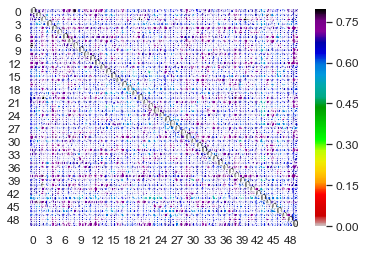

In [36]:
%matplotlib inline
import seaborn as sns

confusion_df = pd.DataFrame(dfcs, index=range(50), columns=range(50))
axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')